In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action="ignore")

import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
plt.rc("font", family=font_name)

import matplotlib as mpl
mpl.rcParams["axes.unicode_minus"] = False

import urllib.request as req
from urllib.request import urlopen
from urllib.error import HTTPError, URLError
import urllib.parse
from bs4 import BeautifulSoup
import requests

In [2]:
game = pd.read_excel("./gamesales.xlsx")

In [13]:
game_pv = game.pivot_table(index=["게임명"], columns="일자", values="매출액", fill_value=0)
game_pv

일자,2016-03-31,2016-06-30,2016-09-30,2016-12-31,2017-03-31,2017-06-30,2017-09-30,2017-12-31,2018-03-31,2018-06-30,...,2019-06-30,2019-09-30,2019-12-31,2020-03-31,2020-06-30,2020-09-30,2020-12-31,2021-03-31,2021-06-30,2021-09-30
게임명,,,,,,,,,,,,,,,,,,,,,
B&S레볼루션M,0,0,0,0,0.000000e+00,0.000000e+00,0,0,0,0.000000e+00,...,0.000000e+00,0.000000e+00,0,0.000000e+00,0.000000e+00,0.000000e+00,0,0,0.000000e+00,0
M,0,0,0,0,1.907603e+11,1.777153e+11,464281000000,409331000000,346445000000,2.118923e+11,...,3.402707e+11,3.123433e+11,439120000000,4.957003e+11,5.303633e+11,9.664573e+11,783197000000,649392000000,5.443227e+11,566390000000
PC,0,0,0,0,8.028040e+11,6.317480e+11,815612500000,647486000000,650400000000,6.093000e+11,...,7.111500e+11,9.807000e+11,804250000000,1.479850e+12,1.137050e+12,1.332400e+12,1185350000000,1686850000000,1.060550e+12,1451500000000
길드워2,30557000000,15894000000,15315000000,14870000000,1.422600e+10,1.355700e+10,20145000000,34903000000,23647000000,1.986000e+10,...,1.588200e+10,1.513800e+10,11331000000,1.253000e+10,1.563900e+10,1.881800e+10,14166000000,16329000000,1.600400e+10,19199000000
리니지,78877000000,94430000000,83767000000,118414000000,5.146400e+10,3.381300e+10,35369000000,33775000000,28268000000,4.208900e+10,...,5.010900e+10,5.182900e+10,51413000000,4.475300e+10,3.426400e+10,4.986800e+10,46782000000,48936000000,3.643900e+10,29147000000
리니지2,17076000000,19052000000,20591000000,20395000000,1.839900e+10,1.666300e+10,15634000000,15095000000,14233000000,1.334000e+10,...,2.121300e+10,2.303300e+10,27785000000,2.644300e+10,2.576400e+10,2.633200e+10,25957000000,26209000000,2.417000e+10,25015000000
리니지2M,0,0,0,0,0.000000e+00,0.000000e+00,0,0,0,0.000000e+00,...,0.000000e+00,0.000000e+00,0,3.411490e+11,1.972690e+11,1.444530e+11,166734000000,152247000000,2.179890e+11,157857000000
리니지M,0,0,0,0,0.000000e+00,0.000000e+00,0,0,0,0.000000e+00,...,0.000000e+00,0.000000e+00,0,2.120110e+11,1.598760e+11,2.451800e+11,211680000000,172637000000,1.341540e+11,150349000000
리지니2레볼루션M,0,0,0,0,0.000000e+00,1.998370e+11,261765000000,240162000000,177590000000,1.402240e+11,...,0.000000e+00,0.000000e+00,0,0.000000e+00,0.000000e+00,0.000000e+00,0,0,0.000000e+00,0


In [14]:
del game_pv["2016-03-31"], game_pv["2016-06-30"], game_pv["2016-09-30"], game_pv["2016-12-31"] #2016년도 제거

In [15]:
game_pv.columns=["1Q2017", "2Q2017", "3Q2017", "4Q2017", "1Q2018", "2Q2018", "3Q2018", "4Q2018",
                "1Q2019", "2Q2019", "3Q2019", "4Q2019", "1Q2020", "2Q2020", "3Q2020", "4Q2020",
                "1Q2021", "2Q2021", "3Q2021"] # 일자를 분기로 변경

In [17]:
mobile_names = []
pc_names = []

index_names = game_pv.index
for n in index_names:
    if n[-1] == "M":
        mobile_names.append(n)
    else:
        pc_names.append(n)
        
print(mobile_names)
print("--------------------------------------------")
print(pc_names)

game_pv.loc[mobile_names]
game_pv.loc[pc_names]

['B&S레볼루션M', 'M', '리니지2M', '리니지M', '리지니2레볼루션M', '마블챔피언M', '마블퓨처파이트M', '모두의마블M', '블레이드앤소울M', '세븐나이츠M', '쿠키잼M', '테라M', '해리포터M']
--------------------------------------------
['PC', '길드워2', '리니지', '리니지2', '블레이드앤소울', '아이온']


,1Q2017,2Q2017,3Q2017,4Q2017,1Q2018,2Q2018,3Q2018,4Q2018,1Q2019,2Q2019,3Q2019,4Q2019,1Q2020,2Q2020,3Q2020,4Q2020,1Q2021,2Q2021,3Q2021
게임명,,,,,,,,,,,,,,,,,,,
PC,8.028040e+11,6.317480e+11,815612500000,647486000000,650400000000,6.093000e+11,9.688375e+11,6.366270e+11,860700000000,7.111500e+11,9.807000e+11,804250000000,1.479850e+12,1.137050e+12,1.332400e+12,1185350000000,1686850000000,1.060550e+12,1451500000000
길드워2,1.422600e+10,1.355700e+10,20145000000,34903000000,23647000000,1.986000e+10,2.095700e+10,1.569900e+10,16337000000,1.588200e+10,1.513800e+10,11331000000,1.253000e+10,1.563900e+10,1.881800e+10,14166000000,16329000000,1.600400e+10,19199000000
리니지,5.146400e+10,3.381300e+10,35369000000,33775000000,28268000000,4.208900e+10,4.030300e+10,3.904500e+10,20719000000,5.010900e+10,5.182900e+10,51413000000,4.475300e+10,3.426400e+10,4.986800e+10,46782000000,48936000000,3.643900e+10,29147000000
리니지2,1.839900e+10,1.666300e+10,15634000000,15095000000,14233000000,1.334000e+10,1.563500e+10,2.067800e+10,21558000000,2.121300e+10,2.303300e+10,27785000000,2.644300e+10,2.576400e+10,2.633200e+10,25957000000,26209000000,2.417000e+10,25015000000
블레이드앤소울,4.456000e+10,3.901000e+10,38046000000,39507000000,33894000000,3.064700e+10,3.009800e+10,2.499300e+10,23267000000,2.110700e+10,2.148600e+10,17998000000,1.961700e+10,1.979800e+10,1.721800e+10,15611000000,14098000000,9.834000e+09,10357000000
아이온,1.329400e+10,1.082700e+10,10157000000,12691000000,18761000000,1.561800e+10,1.636700e+10,1.266700e+10,12323000000,1.239100e+10,1.322400e+10,8064000000,1.014300e+10,8.194000e+09,8.453000e+09,18810000000,23386000000,1.952100e+10,17879000000


In [18]:
mobile = game_pv.loc[mobile_names]
pc = game_pv.loc[pc_names]

<AxesSubplot:>

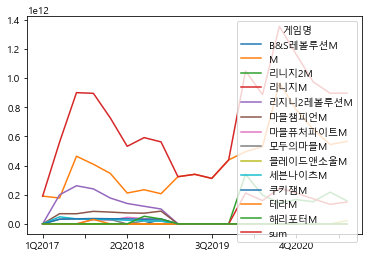

In [32]:
mobile.plot() #게임별로 나눠져 있어서 보기 힘듬

<AxesSubplot:>

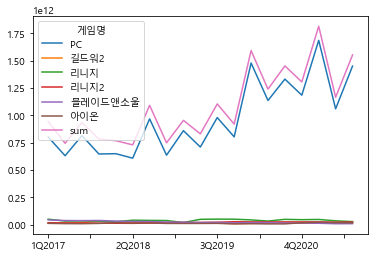

In [33]:
pc.plot() # 이것도 게임별로 나눠져있어서 보기 힘듬

In [21]:
mobile.loc["sum",:] = mobile.sum(axis=0)

In [22]:
pc.loc["sum",:] = pc.sum(axis=0)

In [23]:
mobile=mobile.T # 모바일 전치

In [24]:
pc = pc.T # pc 전치

Text(4Q2019, 1200000000000.0, '코로나19 발생')

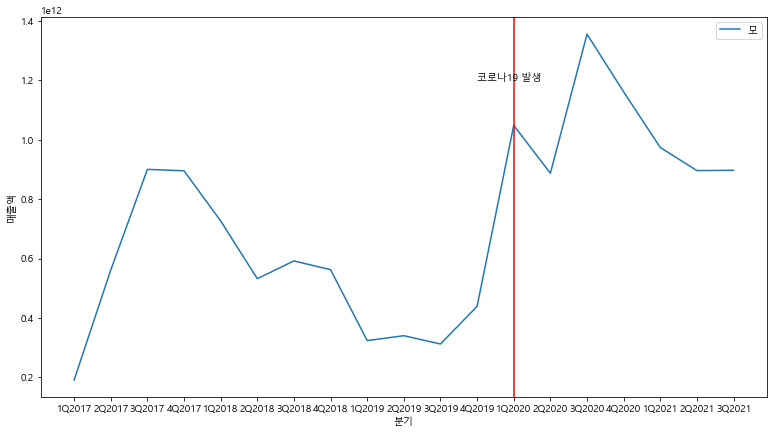

In [30]:
plt.figure(figsize=(13,7))
plt.plot(mobile["sum"])

plt.xlabel("분기")
plt.ylabel("매출액")

plt.legend("모바일 총계")

plt.axvline(x = "1Q2020", color = "r")
plt.text('4Q2019',1.200000e+12, "코로나19 발생")

Text(4Q2019, 1700000000000.0, '코로나19 발생')

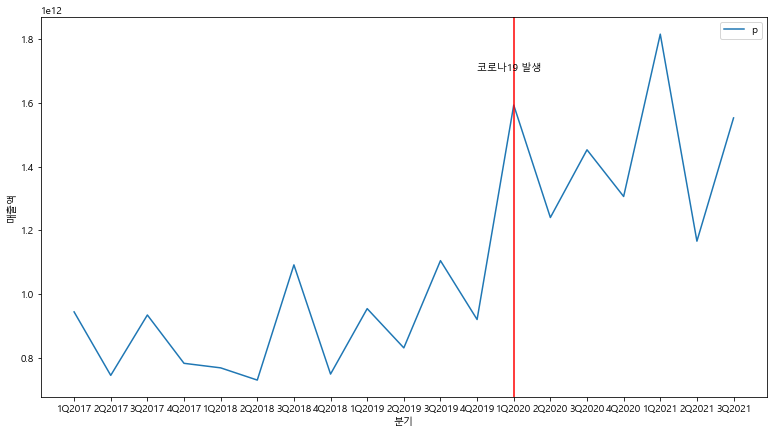

In [31]:
plt.figure(figsize=(13,7))
plt.plot(pc["sum"])

plt.xlabel("분기")
plt.ylabel("매출액")

plt.legend("pc 총계")

plt.axvline(x = "1Q2020", color = "r")
plt.text('4Q2019',1.700000e+12, "코로나19 발생")